## Sample collection

In [1]:
import numpy as np
from scipy.stats import truncnorm
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Number of samples
n_samples = 100

# Parameters for the truncated normal distribution
mean = 5
std = 2  
lower, upper = 0, 10

# Generate random samples more concentrated around 5
X = truncnorm((lower - mean) / std, (upper - mean) / std, loc=mean, scale=std).rvs(n_samples)

# Generate labels
y = np.where(X > 5, 1, -1)

# Example: print the first 10 samples and their labels
for i in range(10):
    print(f"Sample: {X[i]:.2f}, Label: {y[i]}")

Sample: 1.61, Label: -1
Sample: 4.42, Label: -1
Sample: 6.14, Label: 1
Sample: 5.93, Label: 1
Sample: 3.18, Label: -1
Sample: 1.28, Label: -1
Sample: 7.20, Label: 1
Sample: 4.43, Label: -1
Sample: 5.36, Label: 1
Sample: 1.36, Label: -1


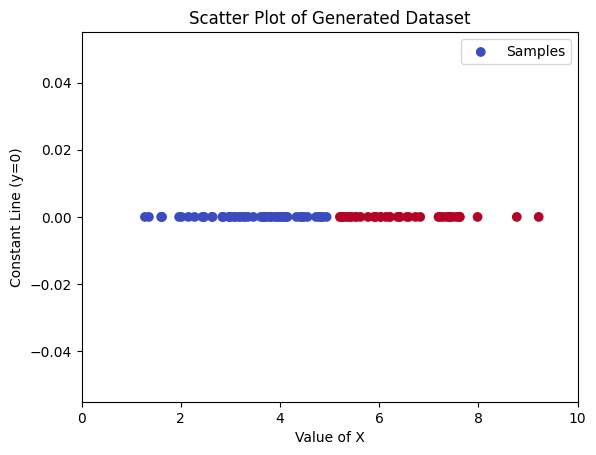

In [2]:
# Assuming X, y, and n_samples are defined

# Create a scatter plot with all points on a single line (e.g., y=0)
plt.scatter(X, [0]*len(X), c=y, cmap='coolwarm', label='Samples')

# Set the limits of the x-axis
plt.xlim(0, 10)

# Add labels and title for clarity
plt.title('Scatter Plot of Generated Dataset')
plt.xlabel('Value of X')
plt.ylabel('Constant Line (y=0)')
plt.legend()

# Display the plot
plt.show()

## Logistic regression(logistic loss)

In [3]:
## Logistic regression with L2 regularization
if X.ndim == 1:
    X = X.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f"Model accuracy: {accuracy:.2f}")

Model accuracy: 1.00


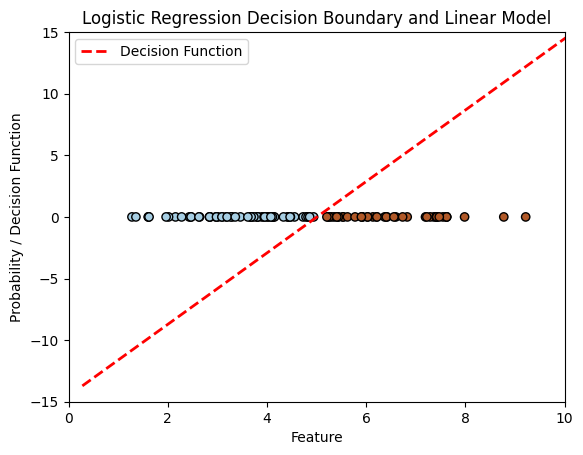

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming X is your 1D feature matrix and y is the target vector

# Plot the original data points
plt.scatter(X, np.zeros_like(X), c=y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlim(0, 10)
plt.ylim(-15, 15)

# Generate a range of values for the feature
x_values = np.linspace(X.min() - 1, X.max() + 1, 400).reshape(-1, 1)

# Calculate the decision function for these values
# For logistic regression: z = w*x + b
z_values = np.dot(x_values, model.coef_.T) + model.intercept_

# Predict the probability for these values
y_values = model.predict_proba(x_values)[:, 1]  # Assuming a binary classification

# Plot the decision boundary (probability)
#plt.plot(x_values, y_values, color='blue', linewidth=2, label='Probability')

# Plot the underlying linear model (decision function)
plt.plot(x_values, z_values, color='red', linewidth=2, linestyle='--', label='Decision Function')

plt.title('Logistic Regression Decision Boundary and Linear Model')
plt.xlabel('Feature')
plt.ylabel('Probability / Decision Function')
plt.legend()
plt.show()

In [5]:
# Print the coefficient(s) and intercept of the model
print("Coefficient(s):", model.coef_)
print("Intercept:", model.intercept_)
x_intercept = -model.intercept_ / model.coef_[0]
print("X-intercept:", x_intercept)

Coefficient(s): [[2.89892076]]
Intercept: [-14.5209513]
X-intercept: [5.00908872]


In [6]:
## Logistic regression without regularization
model = LogisticRegression(penalty=None)
model.fit(X_train, y_train)

predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f"Model accuracy: {accuracy:.2f}")

Model accuracy: 1.00


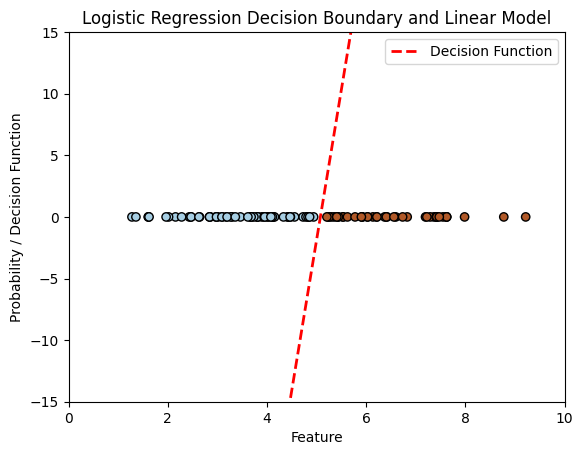

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming X is your 1D feature matrix and y is the target vector

# Plot the original data points
plt.scatter(X, np.zeros_like(X), c=y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlim(0, 10)
plt.ylim(-15, 15)

# Generate a range of values for the feature
x_values = np.linspace(X.min() - 1, X.max() + 1, 400).reshape(-1, 1)

# Calculate the decision function for these values
# For logistic regression: z = w*x + b
z_values = np.dot(x_values, model.coef_.T) + model.intercept_

# Predict the probability for these values
y_values = model.predict_proba(x_values)[:, 1]  # Assuming a binary classification

# Plot the decision boundary (probability)
#plt.plot(x_values, y_values, color='blue', linewidth=2, label='Probability')

# Plot the underlying linear model (decision function)
plt.plot(x_values, z_values, color='red', linewidth=2, linestyle='--', label='Decision Function')

plt.title('Logistic Regression Decision Boundary and Linear Model')
plt.xlabel('Feature')
plt.ylabel('Probability / Decision Function')
plt.legend()
plt.show()

In [8]:
print("Coefficient(s):", model.coef_)
print("Intercept:", model.intercept_)
x_intercept = -model.intercept_ / model.coef_[0]
print("X-intercept:", x_intercept)

Coefficient(s): [[24.40029024]]
Intercept: [-123.89702119]
X-intercept: [5.07768637]


## Hinge loss

In [9]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Assuming X and y are defined

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Initialize the Support Vector Classifier with a linear kernel
model = SVC(kernel='linear', C=1)  # C is the regularization parameter

# Fit the model on the training data
model.fit(X_train, y_train)

# Predict on the testing data
predictions = model.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, predictions)
print(f"Model accuracy: {accuracy:.2f}")

# Print the coefficient(s) and intercept of the model
print("Coefficient(s):", model.coef_)
print("Intercept:", model.intercept_)

Model accuracy: 1.00
Coefficient(s): [[2.14241663]]
Intercept: [-10.60940075]


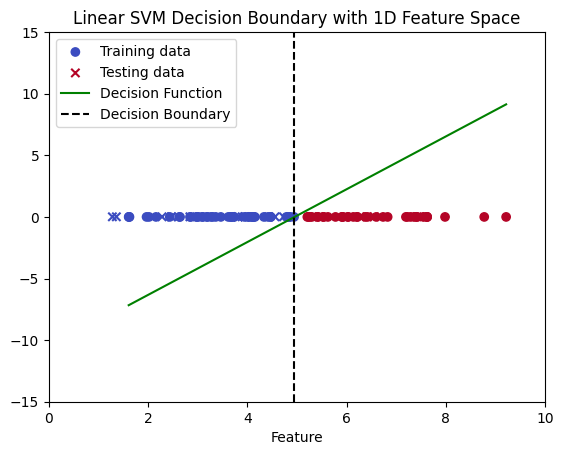

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming X_train, X_test, y_train, y_test, and model are already defined

# Plot the data points for a 1D feature space
plt.scatter(X_train, np.zeros_like(X_train), c=y_train, cmap='coolwarm', label='Training data', marker='o')
plt.scatter(X_test, np.zeros_like(X_test) + 0.01, c=y_test, cmap='coolwarm', label='Testing data', marker='x')
plt.xlim(0,10)
plt.ylim(-15,15)

# Calculate decision boundary for 1D
x_min, x_max = X_train.min(), X_train.max()
x_values = np.linspace(x_min, x_max, 300)
y_decision = model.decision_function(x_values.reshape(-1, 1))

# Plot decision function
plt.plot(x_values, y_decision, color='green', label='Decision Function')

# Find decision boundary (where decision function crosses zero)
decision_boundary_x = x_values[np.where(np.diff(np.sign(y_decision)))[0]]
for db_x in decision_boundary_x:
    plt.axvline(x=db_x, color='k', linestyle='--', label='Decision Boundary' if db_x == decision_boundary_x[0] else "")

plt.xlabel('Feature')
plt.title('Linear SVM Decision Boundary with 1D Feature Space')
plt.legend()
plt.show()

In [11]:
## SVM without soft margin
model = SVC(kernel='linear', C=1e36)  # Set C to a large value for hard margin
model.fit(X_train, y_train)

predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f"Model accuracy: {accuracy:.2f}")

Model accuracy: 1.00


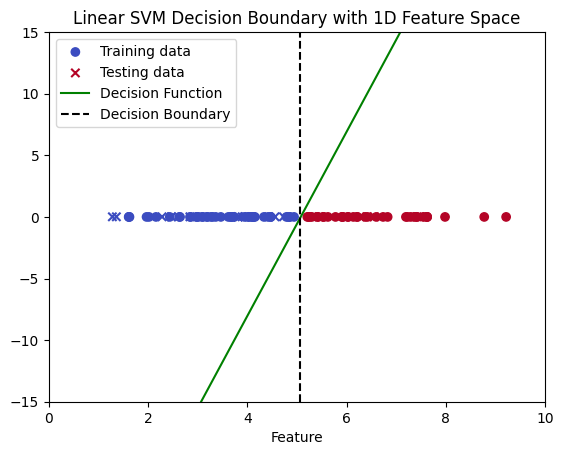

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming X_train, X_test, y_train, y_test, and model are already defined

# Plot the data points for a 1D feature space
plt.scatter(X_train, np.zeros_like(X_train), c=y_train, cmap='coolwarm', label='Training data', marker='o')
plt.scatter(X_test, np.zeros_like(X_test) + 0.01, c=y_test, cmap='coolwarm', label='Testing data', marker='x')
plt.xlim(0,10)
plt.ylim(-15,15)

# Calculate decision boundary for 1D
x_min, x_max = X_train.min(), X_train.max()
x_values = np.linspace(x_min, x_max, 300)
y_decision = model.decision_function(x_values.reshape(-1, 1))

# Plot decision function
plt.plot(x_values, y_decision, color='green', label='Decision Function')

# Find decision boundary (where decision function crosses zero)
decision_boundary_x = x_values[np.where(np.diff(np.sign(y_decision)))[0]]
for db_x in decision_boundary_x:
    plt.axvline(x=db_x, color='k', linestyle='--', label='Decision Boundary' if db_x == decision_boundary_x[0] else "")

plt.xlabel('Feature')
plt.title('Linear SVM Decision Boundary with 1D Feature Space')
plt.legend()
plt.show()

In [13]:
# Print the coefficient(s) and intercept of the model
print("Coefficient(s):", model.coef_)
print("Intercept:", model.intercept_)

Coefficient(s): [[7.46971049]]
Intercept: [-37.91082585]
